# Flight price prediction model
## Instruction:

1. you will have a dataset
2. Find the cheapest and expenses flight at a specific time
3. you have to go through EDA
4. ML Model
5. Find a sweet spot for a cheap ticket.

- Ahmed is a customer of sastaticket.pk. He is planning to fly from karachi to islamabad for his brother's wedding and is currently in the process of choosing ticket. Ahemd has to go to islamabad but ahmed also wants to save some money in the process. so he chooses to wait instead of buy now, simply because ticket prices are just too high.
- Is this right decision? Won't ticket prices increase in the future? Perhaps there is a sweet-spot ahmed is hoping to find and maybe he just might finf it. This is the problem that you will be tacking in this competition.
- Can you predict future prices accurately to such a degree that you can now tell Ahmed - with confidence - that he has made the wrong decision. Your task boils down to generating optimal predictions for flight prices of multiple airlines. If successful, your model will contribute greatly to sastaticket's rich and divers set of operating algorithms.

# 1. Exploratory Data Analysis:
We will information from our data

In [69]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
x_train = pd.read_csv('D:\dataset\sasta ticket\X_train.csv')
y_train = pd.read_csv('D:\dataset\sasta ticket\y_train.csv')
x_test = pd.read_csv('D:\dataset\sasta ticket\X_test.csv')

In [71]:
# check data shape
x_train.shape

(21776590, 11)

In [72]:
# check data
x_train.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69


In [73]:
y_train.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [74]:
# I will take sample out of this data

# merge two datasets to make one
df = pd.concat([x_train, y_train], axis=1) # horizontal
df.sample(15)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
17479526,17479526,2021-08-07 05:46:39.507385+00:00,x,y,2021-08-26 17:00:00+00:00,2021-08-26 18:55:00+00:00,beta,True,20.0,0,b-19,17479526,6570.0
18126660,18126660,2021-08-10 07:26:14.301643+00:00,x,y,2021-08-18 17:00:00+00:00,2021-08-18 18:59:00+00:00,gamma,True,20.0,1,c-6,18126660,7765.0
18900001,18900001,2021-08-13 14:16:28.991752+00:00,x,y,2021-08-23 10:00:00+00:00,2021-08-23 12:00:00+00:00,alpha,True,15.0,1,a-7,18900001,12945.0
18232944,18232944,2021-08-10 16:10:00.189840+00:00,x,y,2021-08-15 10:00:00+00:00,2021-08-15 12:00:00+00:00,gamma,True,20.0,1,c-2,18232944,9000.0
2847150,2847150,2021-03-08 14:35:47.362623+00:00,x,y,2021-03-27 15:30:00+00:00,2021-03-27 17:30:00+00:00,alpha,True,35.0,1,a-7,2847150,8027.0
3147391,3147391,2021-03-12 19:48:42.731494+00:00,x,y,2021-03-15 05:00:00+00:00,2021-03-15 07:00:00+00:00,gamma,True,20.0,1,c-2,3147391,9800.0
1053170,1053170,2021-01-30 11:15:43.921714+00:00,x,y,2021-02-03 11:00:00+00:00,2021-02-03 12:55:00+00:00,beta,True,35.0,0,b-69,1053170,9564.0
14000304,14000304,2021-07-11 17:20:52.580723+00:00,x,y,2021-08-03 13:00:00+00:00,2021-08-03 15:00:00+00:00,alpha,True,35.0,1,a-9,14000304,10545.0
3971181,3971181,2021-03-28 13:57:46.654699+00:00,x,y,2021-04-02 11:00:00+00:00,2021-04-02 13:00:00+00:00,gamma,True,20.0,2,c-4,3971181,10800.0
240213,240213,2021-01-07 11:16:37.535146+00:00,x,y,2021-01-15 16:00:00+00:00,2021-01-15 18:10:00+00:00,alpha,True,0.0,0,a-7,240213,8739.0


In [75]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0


In [76]:
df.shape

(21776590, 13)

In [77]:
df = df.sample(5000)

In [78]:
df.shape

(5000, 13)

In [79]:
# saving a csv file for traning dataset
df.to_csv('D:\dataset\sasta ticket\sastaticket_train.csv')

In [80]:
# saving a testing file data to csv
x_test.sample(250).to_csv('D:\dataset\sasta ticket\sastaticket_test.csv')

In [81]:
df_test = pd.read_csv('D:\dataset\sasta ticket\sastaticket_train.csv')
df_test.head()
# this will give me a chance to look into your assignments

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,15492830,15492830,2021-07-22 21:45:39.842963+00:00,x,y,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,c-2,15492830,9280.0
1,18097482,18097482,2021-08-10 04:24:13.867889+00:00,x,y,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,c-2,18097482,8500.0
2,7117160,7117160,2021-05-18 12:37:26.798560+00:00,x,y,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,a-7,7117160,7124.0
3,16225337,16225337,2021-07-28 00:49:17.733053+00:00,x,y,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,c-6,16225337,11045.0
4,17324854,17324854,2021-08-06 06:12:43.837028+00:00,x,y,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,c-2,17324854,7765.0


In [82]:
print('Column, Rows', df.shape)

Column, Rows (5000, 13)


In [83]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15492830 to 20999705
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  Unnamed: 0  5000 non-null   int64  
 12  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 512.7+ KB


In [84]:
# check null value
df.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [85]:
# summary stat
df.describe()

,Unnamed: 0,f8,f9,Unnamed: 0,target
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.100384e+07,22.683800,0.954800,1.100384e+07,10175.188400
std,6.368554e+06,9.037265,0.611254,6.368554e+06,3457.558144
min,4.811000e+03,0.000000,0.000000,4.811000e+03,1000.000000
25%,5.365436e+06,20.000000,1.000000,5.365436e+06,7872.250000
50%,1.113730e+07,20.000000,1.000000,1.113730e+07,9403.000000
75%,1.650000e+07,32.000000,1.000000,1.650000e+07,11245.000000
max,2.177197e+07,40.000000,2.000000,2.177197e+07,33720.000000


In [86]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
15492830,15492830,2021-07-22 21:45:39.842963+00:00,x,y,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,c-2,15492830,9280.0
18097482,18097482,2021-08-10 04:24:13.867889+00:00,x,y,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,c-2,18097482,8500.0
7117160,7117160,2021-05-18 12:37:26.798560+00:00,x,y,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,a-7,7117160,7124.0
16225337,16225337,2021-07-28 00:49:17.733053+00:00,x,y,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,c-6,16225337,11045.0
17324854,17324854,2021-08-06 06:12:43.837028+00:00,x,y,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,c-2,17324854,7765.0


In [87]:
print(df.columns)

Index(['Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'Unnamed: 0', 'target'],
      dtype='object')


In [88]:
df['f2'].unique()

array(['x'], dtype=object)

In [89]:
# Feature Engineering
# Finding unique values in categorical lists
cat_list = ['f2', 'f3', 'f6', 'f8', 'f9','f10']

# unique value in each column
for i in cat_list:
    print(i, df[i].unique())
    print('..............................') # spearator line

f2 ['x']
..............................
f3 ['y']
..............................
f6 ['gamma' 'alpha' 'beta' 'omega']
..............................
f8 [20. 15. 35. 40.  0. 32.]
..............................
f9 [1 2 0]
..............................
f10 ['c-2' 'a-7' 'c-6' 'c-4' 'a-1' 'a-23' 'a-9' 'b-1' 'a-5' 'b-69' 'b-9' 'd-5'
 'b-19' 'd-1' 'b-67' 'd-3' 'b-319' 'b-73' 'b-369']
..............................


In [90]:
df.drop(['Unnamed: 0','f2','f3','f10'], axis=1, inplace=True)

In [91]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
15492830,2021-07-22 21:45:39.842963+00:00,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,9280.0
18097482,2021-08-10 04:24:13.867889+00:00,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,8500.0
7117160,2021-05-18 12:37:26.798560+00:00,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,7124.0
16225337,2021-07-28 00:49:17.733053+00:00,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,11045.0
17324854,2021-08-06 06:12:43.837028+00:00,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,7765.0


In [92]:
# type casting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15492830 to 20999705
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 317.4+ KB


In [93]:
# convert them ito date and time object
from datetime import date, datetime
df['f1'] = pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])
df['f5'] = pd.to_datetime(df['f5'])


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15492830 to 20999705
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 317.4+ KB


In [95]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
15492830,2021-07-22 21:45:39.842963+00:00,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,9280.0
18097482,2021-08-10 04:24:13.867889+00:00,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,8500.0
7117160,2021-05-18 12:37:26.798560+00:00,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,7124.0
16225337,2021-07-28 00:49:17.733053+00:00,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,11045.0
17324854,2021-08-06 06:12:43.837028+00:00,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,7765.0


In [96]:
# adding column after substraction
df.insert(0,'time_to_dep(s)', ((df['f4']-df['f1']).astype('timedelta64[s]')), True)
df.insert(1,'travel_time(s)', ((df['f5']-df['f4']).astype('timedelta64[s]')), True)

In [97]:
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
15492830,1080860.0,7200.0,2021-07-22 21:45:39.842963+00:00,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,9280.0
18097482,538546.0,7200.0,2021-08-10 04:24:13.867889+00:00,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,8500.0
7117160,2776953.0,7200.0,2021-05-18 12:37:26.798560+00:00,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,7124.0
16225337,58242.0,7140.0,2021-07-28 00:49:17.733053+00:00,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,11045.0
17324854,272836.0,7200.0,2021-08-06 06:12:43.837028+00:00,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,7765.0


In [98]:
df.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

In [99]:
# renaming the columns
df = df.rename(columns={'f12':'f1'})

In [100]:
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
15492830,1080860.0,7200.0,2021-07-22 21:45:39.842963+00:00,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,9280.0
18097482,538546.0,7200.0,2021-08-10 04:24:13.867889+00:00,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,8500.0
7117160,2776953.0,7200.0,2021-05-18 12:37:26.798560+00:00,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,7124.0
16225337,58242.0,7140.0,2021-07-28 00:49:17.733053+00:00,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,11045.0
17324854,272836.0,7200.0,2021-08-06 06:12:43.837028+00:00,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,7765.0


In [101]:
cat_cols = ['f6','f7','f8','f9']
num_cols = ['time_to_dep(s)', 'travel_time(s)']

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

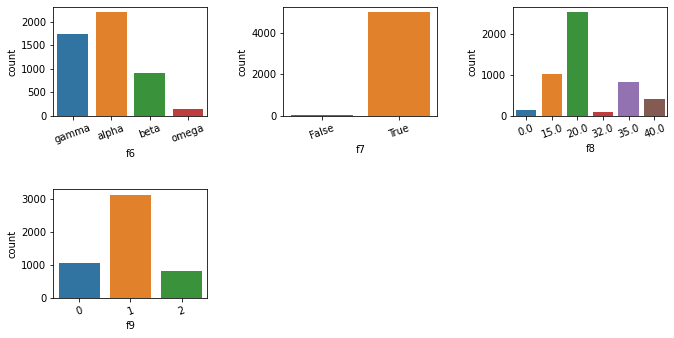

In [102]:
# plotting 
c = 1
plt.figure(figsize=(10, 15))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=20)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


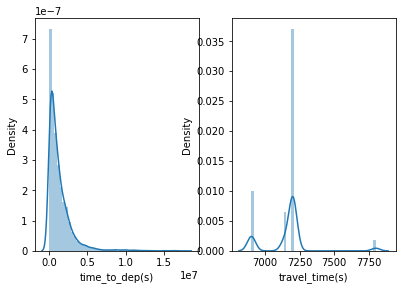

In [103]:
# plotting numerical count plot
c = 1
plt.figure(figsize=(10, 30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    c = c+1
plt.show()

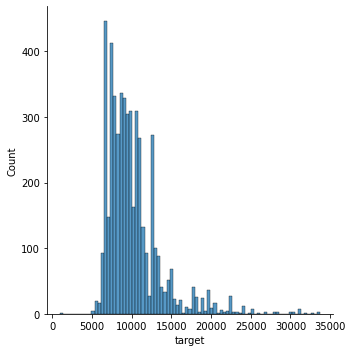

In [104]:
# target 
sns.displot(df.target)

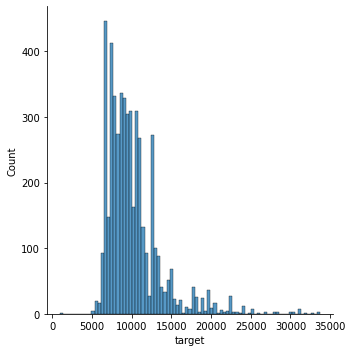

In [105]:
# target 
sns.displot(df['target'])

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

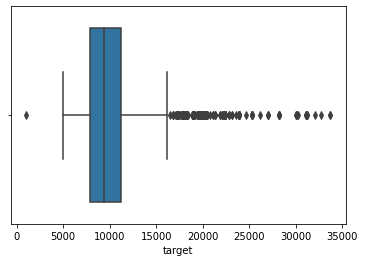

In [106]:
sns.boxplot(df.target)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


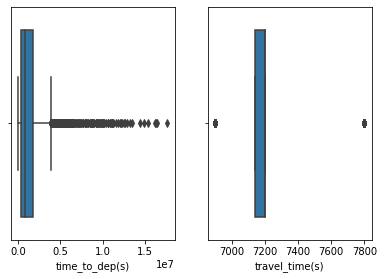

In [107]:
c = 1
plt.figure(figsize=(10, 30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
    c = c+1
plt.show()

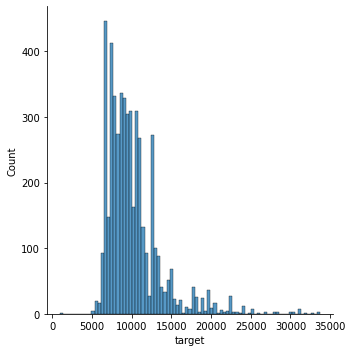

In [108]:
# target
sns.displot(df['target'])


In [109]:
# skew and kurtosis
df.skew()
df.kurtosis()
# outlier removel target

C:\Users\hp\AppData\Local\Temp\ipykernel_8956\2831102396.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()
C:\Users\hp\AppData\Local\Temp\ipykernel_8956\2831102396.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dep(s)     19.023290
travel_time(s)      5.819806
f7                161.835693
f8                 -0.031708
f9                 -0.333183
target              7.199946
dtype: float64

In [110]:
df.drop(['f1','f4','f5'], axis=1, inplace=True)

In [111]:
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
15492830,1080860.0,7200.0,gamma,True,20.0,1,9280.0
18097482,538546.0,7200.0,gamma,True,20.0,2,8500.0
7117160,2776953.0,7200.0,alpha,True,15.0,1,7124.0
16225337,58242.0,7140.0,gamma,True,20.0,1,11045.0
17324854,272836.0,7200.0,gamma,True,20.0,1,7765.0


In [112]:
# encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [113]:
# apply label encoder
df['f6'] = le.fit_transform(df['f6'])
df['f7'] = le.fit_transform(df['f7'])
df['f8'] = le.fit_transform(df['f8'])

In [114]:
df.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
16908637,9489386.0,7200.0,2,1,2,2,13560.0
8799259,622562.0,7200.0,0,1,4,1,10006.0
1805246,785711.0,6900.0,1,1,2,0,11494.0
6611424,2404653.0,7200.0,2,1,2,1,9655.0
18836125,5968970.0,6900.0,1,1,5,0,8380.0
21020473,806343.0,6900.0,1,1,5,0,11210.0
7110788,3629409.0,7200.0,2,1,2,2,1000.0
12938044,1868532.0,7200.0,0,1,4,1,10545.0
2390990,2182618.0,7140.0,2,1,2,1,7390.0
4833309,1039473.0,7200.0,0,1,4,1,5996.0


In [115]:
df.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.336769e+06,7158.780000,0.969800,0.994000,2.325000,0.954800,10175.188400
std,1.637060e+06,165.000475,0.953242,0.077235,1.271573,0.611254,3457.558144
min,1.000000e+00,6900.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,3.394758e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7872.250000
50%,8.540945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.741405e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.762279e+07,7800.000000,3.000000,1.000000,5.000000,2.000000,33720.000000


In [116]:
# sklearn functin to scale our data / normalize
# from sklearn.preprocessing import standardscaler
# sc = standardscaler()
# df['time_to_dep(s)']=sc.fit_transform(df['time_to_dep(s)'])
# df['travel_time(s)']=sc.fit_transform(df['travel_time(s)'])
# df['target']=sc.fit_transform(df['target'])


In [117]:
df.columns

Index(['time_to_dep(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9', 'target'], dtype='object')

In [118]:
# splitting our data into x and y
x = df.drop(['target'], axis=1)
y = df['target']

In [119]:
x.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
15492830,1080860.0,7200.0,2,1,2,1
18097482,538546.0,7200.0,2,1,2,2
7117160,2776953.0,7200.0,0,1,1,1
16225337,58242.0,7140.0,2,1,2,1
17324854,272836.0,7200.0,2,1,2,1


In [120]:
y.head()

15492830     9280.0
18097482     8500.0
7117160      7124.0
16225337    11045.0
17324854     7765.0
Name: target, dtype: float64

# ML Modelling

In [121]:
# regression pipeline or algos

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# root mean squared error
# rms = mean_absolute_error(y_test, y_pred, squared=False)

In [122]:
# shorten the names
lr =LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [123]:
# model loop

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(x_train, y_train) # fitting our model
    pred = i.predict(x_test) # predict
    test_score = r2_score(y_test, pred) # test score
    train_score = r2_score(y_train, i.predict(x_train)) # train score
    if abs(train_score-test_score) <= 0.5:
        print(i)
        print('R2 score is: ', r2_score(y_test, pred))
        print('Mean Absolute error is ', mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('RMSE is ', mean_squared_error(y_test, pred, squared=False))
        print('---------------------------------------------------')

LinearRegression()
R2 score is:  0.08240037470065198
Mean Absolute error is  2319.8557048901707
Mean squared error is  9909988.878327657
RMSE is  3148.013481281117
---------------------------------------------------
SVR()
R2 score is:  -0.04101540865479536
Mean Absolute error is  2297.368018019778
Mean squared error is  11242867.627121372
RMSE is  3353.0385663039087
---------------------------------------------------
KNeighborsRegressor()
R2 score is:  -0.10791692962577804
Mean Absolute error is  2529.8388
Mean squared error is  11965397.70504
RMSE is  3459.1035984832833
---------------------------------------------------


In [132]:
# model loop

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(x_train, y_train) # fitting our model
    pred = i.predict(x_test) # predict
    test_score = r2_score(y_test, pred) # test score
    train_score = r2_score(y_train, i.predict(x_train)) # train score
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is: ', r2_score(y_test, pred))
        print('Mean Absolute error is ', mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('RMSE is ', mean_squared_error(y_test, pred, squared=False))
        print('---------------------------------------------------')

# to save the prediction
res = pd.DataFrame(pred)
res.index = x_test.index # its important for comparison
res.columns = ['prediction']
res.to_csv('D:\dataset\sasta ticket\prediction_result_with_traintestsplit.csv')

LinearRegression()
R2 score is:  0.08240037470065198
Mean Absolute error is  2319.8557048901707
Mean squared error is  9909988.878327657
RMSE is  3148.013481281117
---------------------------------------------------
SVR()
R2 score is:  -0.04101540865479536
Mean Absolute error is  2297.368018019778
Mean squared error is  11242867.627121372
RMSE is  3353.0385663039087
---------------------------------------------------


In [133]:
df_test.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,15492830,15492830,2021-07-22 21:45:39.842963+00:00,x,y,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,c-2,15492830,9280.0
1,18097482,18097482,2021-08-10 04:24:13.867889+00:00,x,y,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,c-2,18097482,8500.0
2,7117160,7117160,2021-05-18 12:37:26.798560+00:00,x,y,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,a-7,7117160,7124.0
3,16225337,16225337,2021-07-28 00:49:17.733053+00:00,x,y,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,c-6,16225337,11045.0
4,17324854,17324854,2021-08-06 06:12:43.837028+00:00,x,y,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,c-2,17324854,7765.0


In [135]:
# final data prediction
lr = LinearRegression().fit(x,y)
pred =lr.predict(df_test)
# to save the prediction
res = pd.DataFrame(pred)
res.index = x_test.index # its important for comparison
res.columns = ['prediction']
res.to_csv('D:\dataset\sasta ticket\prediction_result.csv')

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
- Unnamed: 0.1
- Unnamed: 0.2
- f1
- f10
- ...
Feature names seen at fit time, yet now missing:
- time_to_dep(s)
- travel_time(s)

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: '2021-07-22 21:45:39.842963+00:00'

# Second Method

In [125]:
df1 = pd.read_csv('D:\dataset\sasta ticket\sastaticket_train.csv')
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,15492830,15492830,2021-07-22 21:45:39.842963+00:00,x,y,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,c-2,15492830,9280.0
1,18097482,18097482,2021-08-10 04:24:13.867889+00:00,x,y,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,c-2,18097482,8500.0
2,7117160,7117160,2021-05-18 12:37:26.798560+00:00,x,y,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,a-7,7117160,7124.0
3,16225337,16225337,2021-07-28 00:49:17.733053+00:00,x,y,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,c-6,16225337,11045.0
4,17324854,17324854,2021-08-06 06:12:43.837028+00:00,x,y,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,c-2,17324854,7765.0


In [136]:
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target,time_1,time_2
15492830,1080860.0,7200.0,2,1,2,1,9280.0,12:14:20,2:00:00
18097482,538546.0,7200.0,2,1,2,2,8500.0,5:35:46,2:00:00
7117160,2776953.0,7200.0,0,1,1,1,7124.0,3:22:33,2:00:00
16225337,58242.0,7140.0,2,1,2,1,11045.0,16:10:42,1:59:00
17324854,272836.0,7200.0,2,1,2,1,7765.0,3:47:16,2:00:00


In [126]:
date_format_str = '%Y/%m/%d %H:%M:%S.%f'

df1['f1'] = pd.to_datetime(df1['f1'])
df1['f4'] = pd.to_datetime(df1['f4'])

f1 = pd.to_datetime(df1['f1'], date_format_str)
f4 = pd.to_datetime(df1['f4'], date_format_str)
diff = f4 -f1
df1['delta'] = diff

In [127]:
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target,delta
0,15492830,15492830,2021-07-22 21:45:39.842963+00:00,x,y,2021-08-04 10:00:00+00:00,2021-08-04 12:00:00+00:00,gamma,True,20.0,1,c-2,15492830,9280.0,12 days 12:14:20.157037
1,18097482,18097482,2021-08-10 04:24:13.867889+00:00,x,y,2021-08-16 10:00:00+00:00,2021-08-16 12:00:00+00:00,gamma,True,20.0,2,c-2,18097482,8500.0,6 days 05:35:46.132111
2,7117160,7117160,2021-05-18 12:37:26.798560+00:00,x,y,2021-06-19 16:00:00+00:00,2021-06-19 18:00:00+00:00,alpha,True,15.0,1,a-7,7117160,7124.0,32 days 03:22:33.201440
3,16225337,16225337,2021-07-28 00:49:17.733053+00:00,x,y,2021-07-28 17:00:00+00:00,2021-07-28 18:59:00+00:00,gamma,True,20.0,1,c-6,16225337,11045.0,0 days 16:10:42.266947
4,17324854,17324854,2021-08-06 06:12:43.837028+00:00,x,y,2021-08-09 10:00:00+00:00,2021-08-09 12:00:00+00:00,gamma,True,20.0,1,c-2,17324854,7765.0,3 days 03:47:16.162972


In [128]:
df.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.336769e+06,7158.780000,0.969800,0.994000,2.325000,0.954800,10175.188400
std,1.637060e+06,165.000475,0.953242,0.077235,1.271573,0.611254,3457.558144
min,1.000000e+00,6900.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,3.394758e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7872.250000
50%,8.540945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.741405e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.762279e+07,7800.000000,3.000000,1.000000,5.000000,2.000000,33720.000000


In [129]:
# function to calculate time
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return '%d:%02d:%02d' % (hour, minutes, seconds)

# columns addition
df['time_1'] = df['time_to_dep(s)'].apply(convert)
df['time_2'] = df['travel_time(s)'].apply(convert)
df.sample(100)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target,time_1,time_2
9892160,56295.0,7200.0,2,1,2,1,6620.0,15:38:15,2:00:00
2196247,1295622.0,7140.0,2,1,2,1,7390.0,23:53:42,1:59:00
10695111,1740110.0,7140.0,2,1,2,2,7620.0,3:21:50,1:59:00
9641748,296446.0,7140.0,2,1,2,2,7900.0,10:20:46,1:59:00
8223990,6185.0,7200.0,0,1,1,1,13592.0,1:43:05,2:00:00
...,...,...,...,...,...,...,...,...,...
19000928,557022.0,7200.0,0,1,2,1,14645.0,10:43:42,2:00:00
7051470,3238861.0,7200.0,2,1,2,2,10655.0,11:41:01,2:00:00
3642841,824421.0,7200.0,2,1,2,2,10800.0,13:00:21,2:00:00
278363,95705.0,7800.0,0,1,2,1,10227.0,2:35:05,2:10:00


In [130]:
df['time_1'].min()

'0:00:01'

In [131]:
df['time_1'].max()

'9:59:37'